# Lyft Bay Wheels Data Exploration
## by Wakana Morlan

Bay Wheel is a bike-sharing service available in the San Francisco Bay area operated by Lyft. It was formerly known as "Ford GoBike", however, the company behind the service, Motivate was acquired by Lyft. After the acquisition, the system was subsequently renamed to Bay Wheels in June 2019. 


## Preliminary Wrangling

This document explores a dataset containing 94802 trip records of BayWheels in January 2018.  The original data is available to download from [here](https://www.lyft.com/bikes/bay-wheels/system-data).

In [168]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [169]:
BayWheels = pd.read_csv('201801-fordgobike-tripdata.csv')

In [170]:
#High-level overview of data shape and composition
BayWheels.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No
5,6477,2018-01-31 22:58:44.8670,2018-02-01 00:46:41.9080,236,Market St at 8th St,37.803686,-122.282497,160,West Oakland BART Station,37.805318,-122.294837,1306,Customer,NaN,NaN,No
6,453,2018-01-31 23:53:53.6320,2018-02-01 00:01:26.8050,110,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134,Valencia St at 24th St,37.752428,-122.420628,3571,Subscriber,1988.0,Male,No
7,180,2018-01-31 23:52:09.9030,2018-01-31 23:55:10.8070,81,Berry St at 4th St,37.775880,-122.393170,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,1403,Subscriber,1980.0,Male,No
8,996,2018-01-31 23:34:56.0040,2018-01-31 23:51:32.6740,134,Valencia St at 24th St,37.752428,-122.420628,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,3675,Subscriber,1987.0,Male,Yes
9,825,2018-01-31 23:34:14.0270,2018-01-31 23:47:59.8090,305,Ryland Park,37.342725,-121.895617,317,San Salvador St at 9th St,37.333955,-121.877349,1453,Subscriber,1994.0,Female,Yes


In [171]:
BayWheels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94802 entries, 0 to 94801
Data columns (total 16 columns):
duration_sec               94802 non-null int64
start_time                 94802 non-null object
end_time                   94802 non-null object
start_station_id           94802 non-null int64
start_station_name         94802 non-null object
start_station_latitude     94802 non-null float64
start_station_longitude    94802 non-null float64
end_station_id             94802 non-null int64
end_station_name           94802 non-null object
end_station_latitude       94802 non-null float64
end_station_longitude      94802 non-null float64
bike_id                    94802 non-null int64
user_type                  94802 non-null object
member_birth_year          86963 non-null float64
member_gender              87001 non-null object
bike_share_for_all_trip    94802 non-null object
dtypes: float64(5), int64(4), object(7)
memory usage: 11.6+ MB


In [172]:
#Convert start_time and end_time to DateTime format
BayWheels['start_time'] = pd.to_datetime(BayWheels['start_time'])
BayWheels['end_time'] = pd.to_datetime(BayWheels['end_time'])

In [173]:
#Sort start_time and end_time 
BayWheels.sort_values(by=['start_time'])

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
94662,13709,2018-01-01 00:01:53.847,2018-01-01 03:50:23.433,86,Market St at Dolores St,37.769305,-122.426826,119,18th St at Noe St,37.761047,-122.432642,2924,Customer,NaN,NaN,No
94801,145,2018-01-01 00:07:41.040,2018-01-01 00:10:06.241,316,San Salvador St at 1st St,37.330165,-121.885831,311,Paseo De San Antonio at 2nd St,37.333798,-121.886943,2473,Subscriber,1957.0,Male,No
94800,714,2018-01-01 00:07:52.943,2018-01-01 00:19:47.075,74,Laguna St at Hayes St,37.776435,-122.426244,70,Central Ave at Fell St,37.773311,-122.444293,2423,Subscriber,1986.0,Male,No
94799,1151,2018-01-01 00:09:31.745,2018-01-01 00:28:43.159,97,14th St at Mission St,37.768265,-122.420110,125,20th St at Bryant St,37.759200,-122.409851,3455,Subscriber,1992.0,Male,No
94793,1359,2018-01-01 00:14:37.187,2018-01-01 00:37:16.445,11,Davis St at Jackson St,37.797280,-122.398436,323,Broadway at Kearny,37.798014,-122.405950,2173,Customer,1995.0,Male,No
94658,17554,2018-01-01 00:15:26.639,2018-01-01 05:08:01.005,55,Webster St at Grove St,37.777053,-122.429558,285,Webster St at O'Farrell St,37.783521,-122.431158,2315,Customer,NaN,NaN,No
94791,1451,2018-01-01 00:15:30.520,2018-01-01 00:39:42.491,55,Webster St at Grove St,37.777053,-122.429558,29,O'Farrell St at Divisadero St,37.782405,-122.439446,1128,Customer,NaN,NaN,No
94770,2603,2018-01-01 00:15:33.369,2018-01-01 00:58:56.522,17,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,8,The Embarcadero at Vallejo St,37.799953,-122.398525,1788,Subscriber,1994.0,Male,Yes
94766,2478,2018-01-01 00:17:54.588,2018-01-01 00:59:13.448,17,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,8,The Embarcadero at Vallejo St,37.799953,-122.398525,1586,Subscriber,1993.0,Female,Yes
94796,752,2018-01-01 00:19:13.710,2018-01-01 00:31:46.344,23,The Embarcadero at Steuart St,37.791464,-122.391034,66,3rd St at Townsend St,37.778742,-122.392741,1019,Customer,NaN,NaN,No


In [174]:
#Sort start_time and end_time 
BayWheels.sort_values(by=['end_time'], ascending = False)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No
5,6477,2018-01-31 22:58:44.867,2018-02-01 00:46:41.908,236,Market St at 8th St,37.803686,-122.282497,160,West Oakland BART Station,37.805318,-122.294837,1306,Customer,NaN,NaN,No
6,453,2018-01-31 23:53:53.632,2018-02-01 00:01:26.805,110,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134,Valencia St at 24th St,37.752428,-122.420628,3571,Subscriber,1988.0,Male,No
7,180,2018-01-31 23:52:09.903,2018-01-31 23:55:10.807,81,Berry St at 4th St,37.775880,-122.393170,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,1403,Subscriber,1980.0,Male,No
8,996,2018-01-31 23:34:56.004,2018-01-31 23:51:32.674,134,Valencia St at 24th St,37.752428,-122.420628,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,3675,Subscriber,1987.0,Male,Yes
9,825,2018-01-31 23:34:14.027,2018-01-31 23:47:59.809,305,Ryland Park,37.342725,-121.895617,317,San Salvador St at 9th St,37.333955,-121.877349,1453,Subscriber,1994.0,Female,Yes


In [175]:
BayWheels.shape

(94802, 16)

In [176]:
BayWheels.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,94802.000000,94802.000000,94802.000000,94802.000000,94802.00000,94802.000000,94802.000000,94802.000000,86963.000000
mean,870.935930,103.766302,37.773321,-122.361677,101.00982,37.773536,-122.360776,2048.751609,1980.932420
std,2550.596891,87.730464,0.085744,0.105253,86.77949,0.085552,0.104580,1091.507513,10.803017
min,61.000000,3.000000,37.317298,-122.444293,3.00000,37.317298,-122.444293,11.000000,1900.000000
25%,359.000000,30.000000,37.771662,-122.412408,27.00000,37.773063,-122.411306,1133.000000,1975.000000
50%,555.000000,79.000000,37.781270,-122.398773,76.00000,37.781752,-122.398436,2151.500000,1983.000000
75%,854.000000,160.000000,37.795392,-122.390428,157.00000,37.795392,-122.390428,3015.000000,1989.000000
max,85546.000000,342.000000,37.880222,-121.874119,342.00000,37.880222,-121.874119,3744.000000,2000.000000


### What is the structure of your dataset?

There are 94802 trip records in this dataset. Each trip is anonymized and includes:
- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type
- Member Year of Birth
- Member Gender

##### There are 2 user types:  Subscriber and Customer
- “Subscriber”  are members who pay a monthly or annual membership fee for a better rate.
- “Customer” are casual riders who pay for a one-time ride fee. 

### pricing

###### Non-members
2 USD for one ride up to 30 minutes and an extra 3 USD per additional 15 minutes after 30 minutes ride. 

###### Monthly Membership
15 USD per month
Members receive unlimited 45-minute trips on any of BayWheel bikes. If you keep a bike out longer than 45 minutes at a time, it’s an extra 3 USD per additional 15 minutes.

###### Annual Membership
149 USD a year (that’s less than 13 USD  per month), you’ll receive unlimited 45-minute trips on any of our bikes. If you keep a bike out longer than 45 minutes at a time, it’s an extra 3 USD per additional 15 minutes.


### What is/are the main feature(s) of interest in your dataset?

I'm most interested in the difference in service usage of Bay Wheel by user type.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect the trip duration and distance by user type will be important in this investigation. 

## Univariate Exploration

Calculate the distance of each trip using [GoePy](https://geopy.readthedocs.io/en/stable/#module-geopy.distance)

In [177]:
import geopy
from geopy import distance

def calculate_distance(trip):
    start_station = (trip['start_station_latitude'], trip['start_station_longitude'])
    end_station = (trip['end_station_latitude'], trip['end_station_longitude'])
    return distance.distance(start_station, end_station).km


BayWheels['distance'] = BayWheels.apply(lambda row: calculate_distance(row), axis=1)

BayWheels.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No,2.488001
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No,0.000000
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No,2.972357
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No,2.053291
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No,2.443038


### 1) Trip Duration

In [178]:
#Calculate bin size 

import scipy.stats as ss
iqr = ss.iqr(BayWheels['duration_sec'])

n = BayWheels.shape[0]
bin_size = 2* iqr*n **(-1/3)

print(bin_size)

#For a better readability, I'm going to use 20 as bin size instead of 21.711809912571592

21.711809912571592


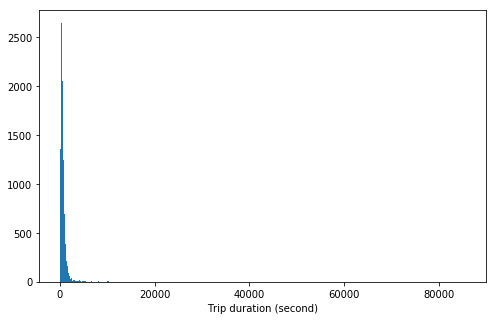

In [179]:
binsize = 20
bins = np.arange(0, BayWheels['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8,5])
plt.hist(data = BayWheels, x = 'duration_sec', bins = bins)
plt.xlabel('Trip duration (second)')
plt.show()

It seems like there are outliers, which scale up the plot quite a lot and make it difficult to obtain the right insights. Let's investinage the large number(s) in the travel time using Pandas [`sort_values`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html) function. 

In [180]:
BayWheels.sort_values(by=['duration_sec'], ascending = False)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance
2228,85546,2018-01-30 14:45:44.480,2018-01-31 14:31:31.053,6,The Embarcadero at Sansome St,37.804770,-122.403234,24,Spear St at Folsom St,37.789677,-122.390428,364,Customer,NaN,NaN,No,2.019516
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No,0.000000
60139,85079,2018-01-13 13:44:59.589,2018-01-14 13:22:59.272,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,31,Raymond Kimbell Playground,37.783813,-122.434559,2841,Customer,NaN,NaN,No,1.734037
19446,84609,2018-01-25 17:35:02.514,2018-01-26 17:05:12.371,49,S Park St at 3rd St,37.780760,-122.394989,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,3642,Subscriber,1989.0,Male,No,1.072974
69713,84193,2018-01-10 10:01:32.352,2018-01-11 09:24:46.268,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,72,Page St at Scott St,37.772406,-122.435650,3653,Subscriber,1969.0,Male,No,4.454100
58407,81712,2018-01-14 13:13:21.061,2018-01-15 11:55:13.325,191,Market St at 40th St,37.830545,-122.273937,191,Market St at 40th St,37.830545,-122.273937,125,Customer,NaN,NaN,No,0.000000
60173,80533,2018-01-13 14:46:01.962,2018-01-14 13:08:15.778,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,56,Koshland Park,37.773414,-122.427317,690,Customer,NaN,NaN,No,2.442930
92407,80302,2018-01-01 11:36:19.268,2018-01-02 09:54:42.148,241,Ashby BART Station,37.852477,-122.270213,241,Ashby BART Station,37.852477,-122.270213,3430,Customer,1989.0,Male,No,0.000000
70527,79678,2018-01-10 09:43:42.671,2018-01-11 07:51:41.280,222,10th Ave at E 15th St,37.792714,-122.248780,46,San Antonio Park,37.790140,-122.242373,1266,Customer,NaN,NaN,No,0.632502
64492,79673,2018-01-11 17:46:48.473,2018-01-12 15:54:42.174,197,El Embarcadero at Grand Ave,37.808848,-122.249680,202,Washington St at 8th St,37.800754,-122.274894,3597,Subscriber,1966.0,Male,Yes,2.395329


By just looking at the first 10 longest duration, a certain number of people use the BayWheel more than a few hours. Let's explore the frequency of the usage by hour.

In [181]:
hours = 60**2
bins = np.arange(0, hours*24+hours, hours)
ticks = list(range(hours, hours*25, hours))
tick_label = list(range(1, 25)) 

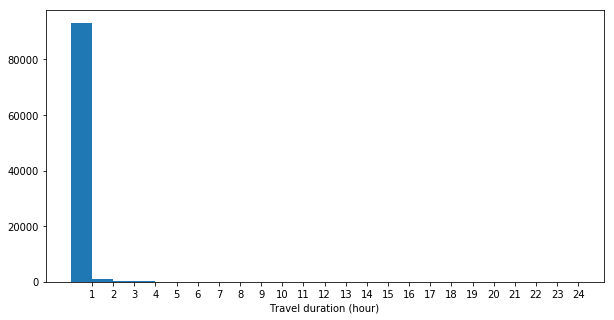

In [182]:
plt.figure(figsize=[10,5])
plt.hist(data = BayWheels, x = 'duration_sec', bins = bins)
plt.xlabel('Travel duration (hour)')
plt.xticks(ticks, tick_label)
plt.show()

From this histogram, we can see that most of the trips lasted less than 1 hour. Let's look into and compare the trips lasted within 1 hour and trips lasted over 1 hour. 


To compare these 2 types of trips; trips lasted less than 1 hour and trips lasted over 1 hour, I'm going to used pandas query function to create 2 sub-data frames that contain data of each type of trip.

In [183]:
minutes = 60
bins = np.arange(0, minutes*60+minutes, minutes)
ticks = list(range(minutes, minutes*61, minutes))
tick_label = list(range(1, 61)) 

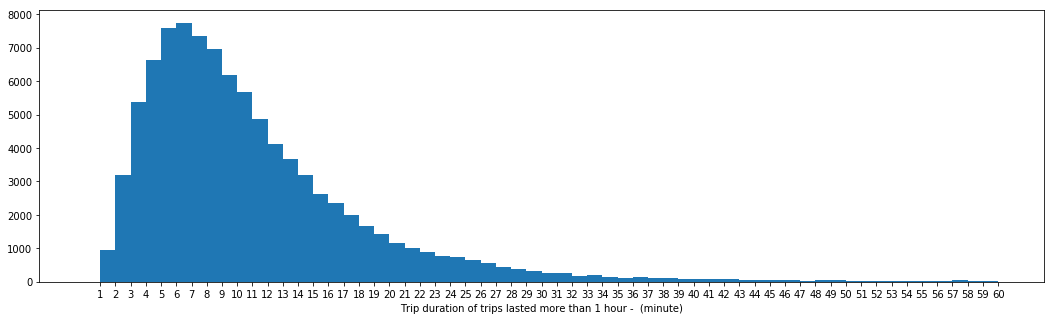

In [184]:
#Trip lasted less than 1 hour
BayWheels_1hour = BayWheels.query('duration_sec < 3600')

plt.figure(figsize=[18,5])
plt.hist(data = BayWheels_1hour, x = 'duration_sec', bins = bins)
plt.xlabel('Trip duration of trips lasted more than 1 hour -  (minute)')
plt.xticks(ticks, tick_label)
plt.show()

In [185]:
#trip lasted more than 1 hour

BayWheels_over1 = BayWheels.query('duration_sec >= 3600')
BayWheels_over1.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No,2.488001
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No,0.000000
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No,2.972357
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No,2.053291
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No,2.443038


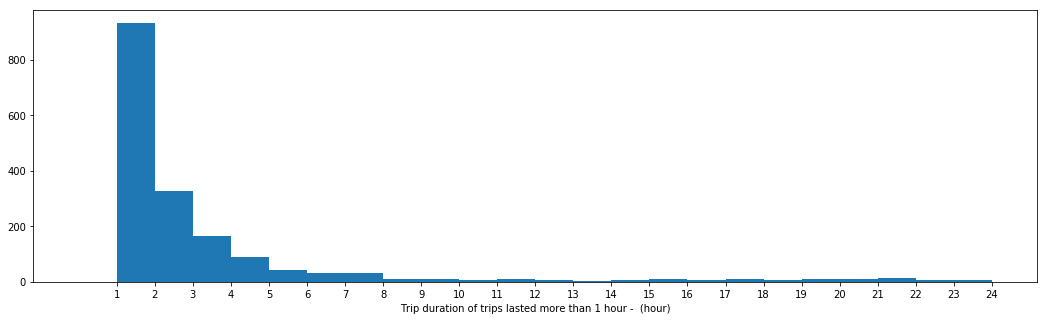

In [186]:
hours = 60**2
bins = np.arange(0, hours*24+hours, hours)
ticks = list(range(hours, hours*25, hours))
tick_label = list(range(1, 25)) 

plt.figure(figsize=[18,5])
plt.hist(data = BayWheels_over1, x = 'duration_sec', bins = bins)
plt.xlabel('Trip duration of trips lasted more than 1 hour -  (hour)')
plt.xticks(ticks, tick_label)
plt.show()

Most of the trips lasted less than 1 hour and the most common trip duration is 6 - 7 minutes. For the trips lasted over 1 hour, riding for 1 - 2 hours is the most common and the duration of trips decreases until 8 hours of the ride. After 6 hours, we see a small number of rides in each duration hour. This means that the records of long hour trips are not errors and users did use the service for longer hours.

### 2) Trip distance

In [187]:
BayWheels['distance'].describe()

count    94802.000000
mean         1.621266
std          1.015005
min          0.000000
25%          0.905740
50%          1.401670
75%          2.100679
max         14.095063
Name: distance, dtype: float64

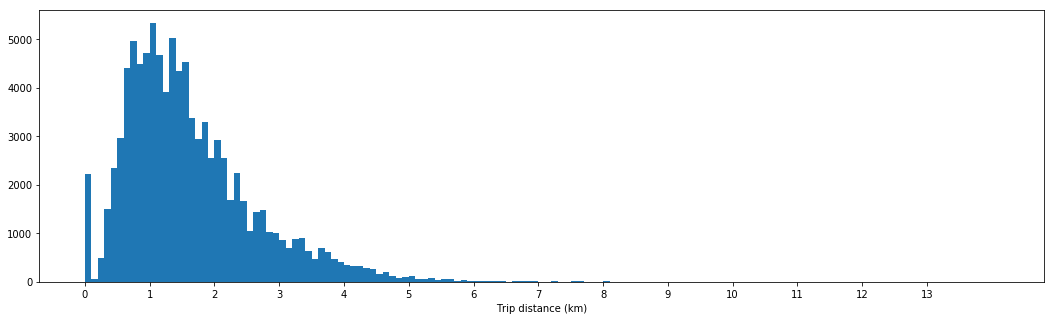

In [188]:
#Create a histgram for the trip distance

binsize = 0.1
bins = np.arange(0, BayWheels['distance'].max()+binsize, binsize)

ticks = list(range(0, 14))
tick_label = list(range(0, 14))

plt.figure(figsize=[18,5])
plt.hist(data = BayWheels, x = 'distance', bins = bins)
plt.xlabel('Trip distance (km)')
plt.xticks(ticks, tick_label)
plt.show()

Most common trip distance is around 1 km and the majority of trips were made within 2km. We also notice that there are many 0km trips. I assume these are the trips that users started and ended the trip at the same station. 

In [189]:
BayWheels.query('start_station_name == end_station_name').duration_sec.count()

2207

There are total 2207 round trips, i.e. users started and ended the trip at the same station. 

### 3) The most used stations

In [190]:
base_color = '#FF00BF'

#Get the order of bars by frequency
start_order = BayWheels['start_station_name'].value_counts()
start_order = start_order.index

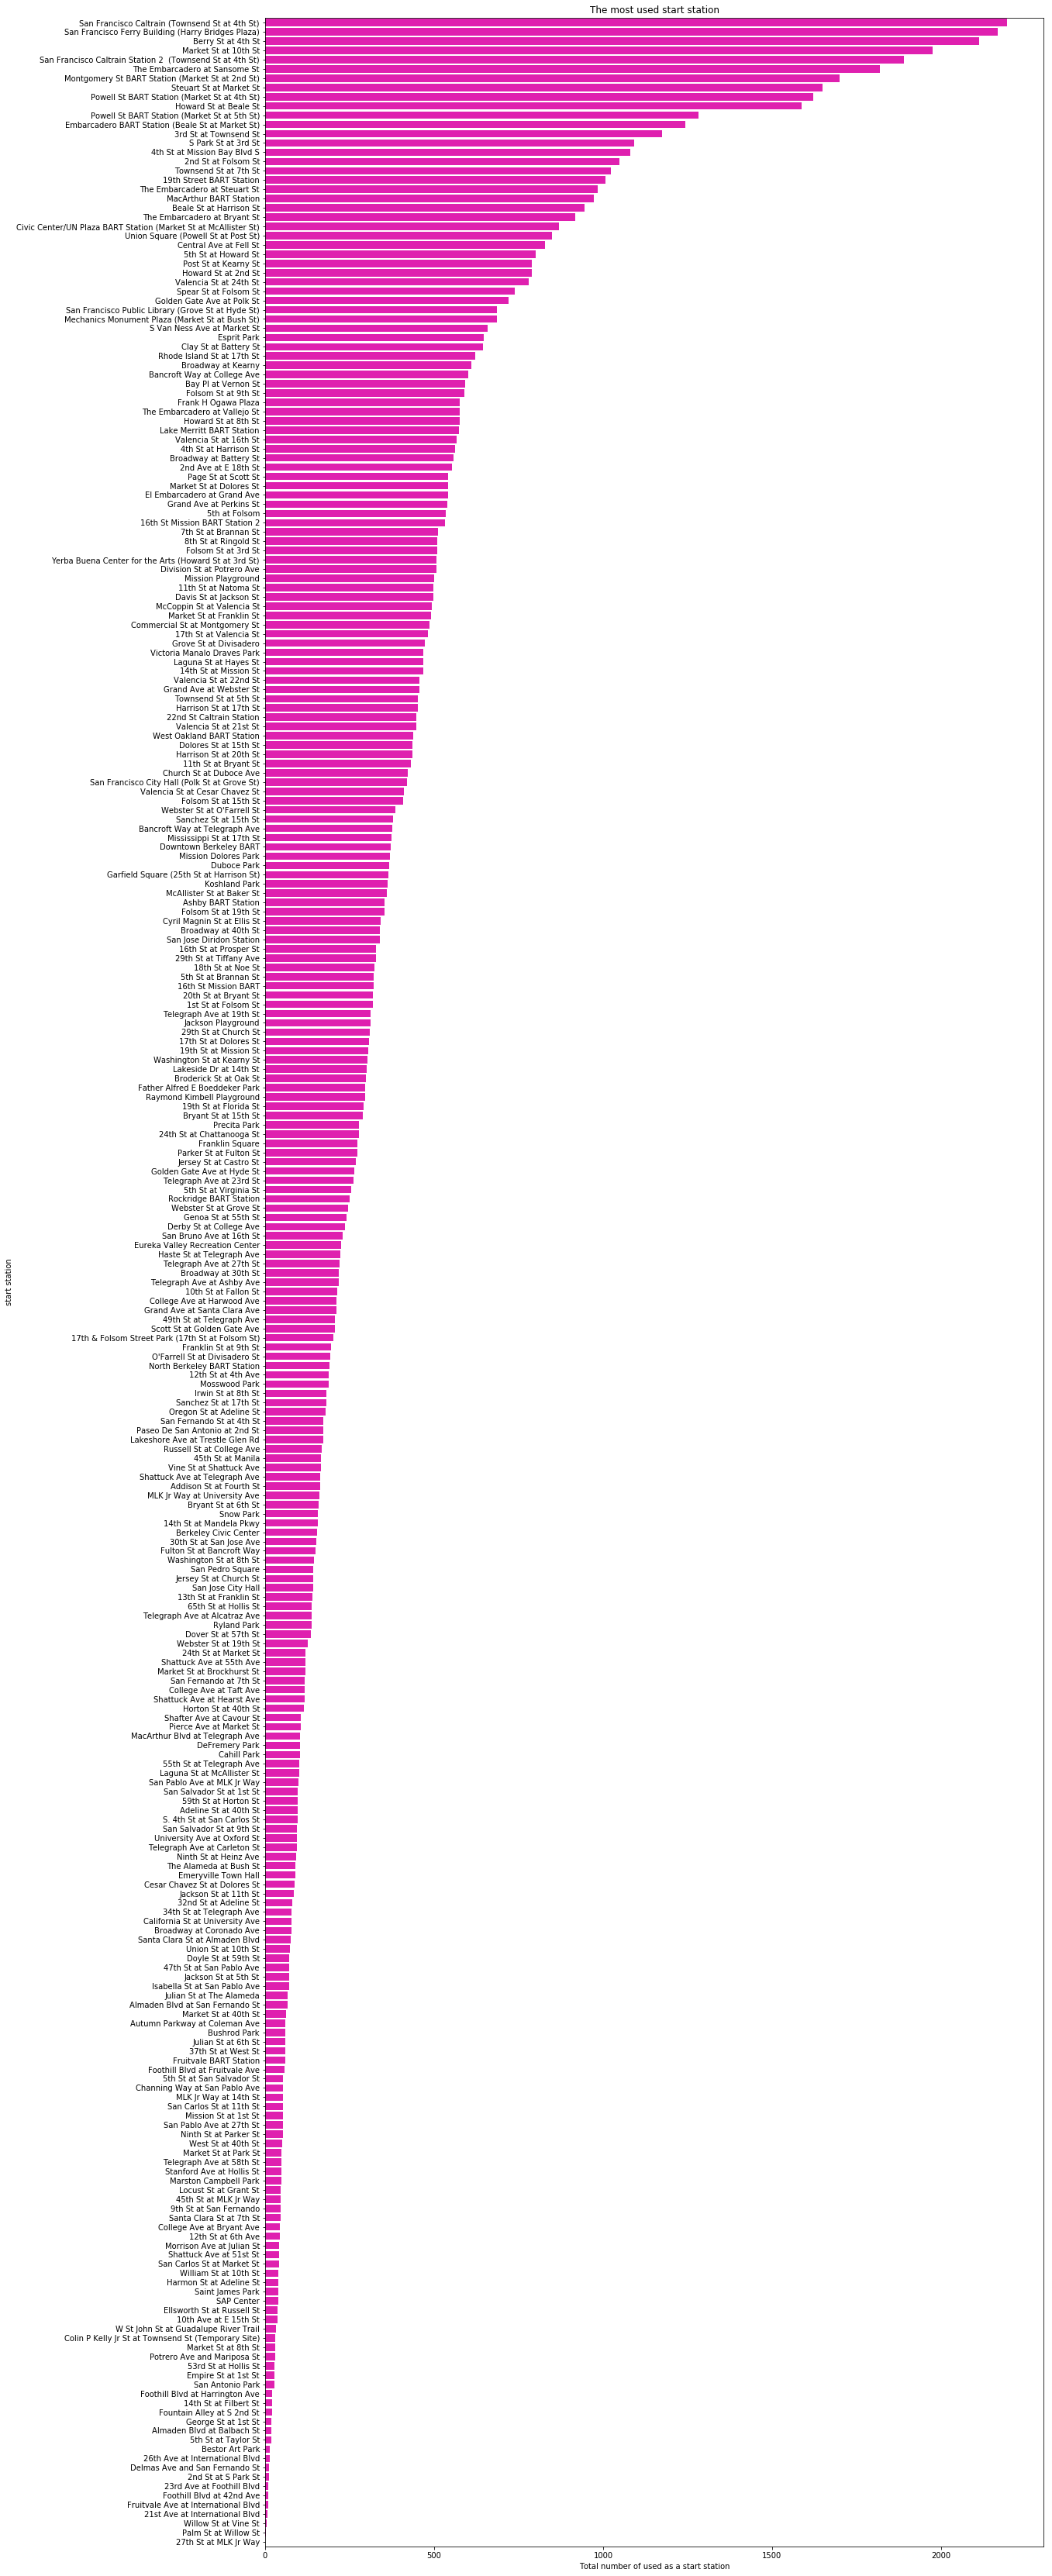

In [191]:
plt.figure(figsize=[18,60])
sb.countplot(data = BayWheels, y='start_station_name', color = base_color, order = start_order)
plt.ylabel('start station')
plt.title('The most used start station')
plt.xlabel('Total number of used as a start station');

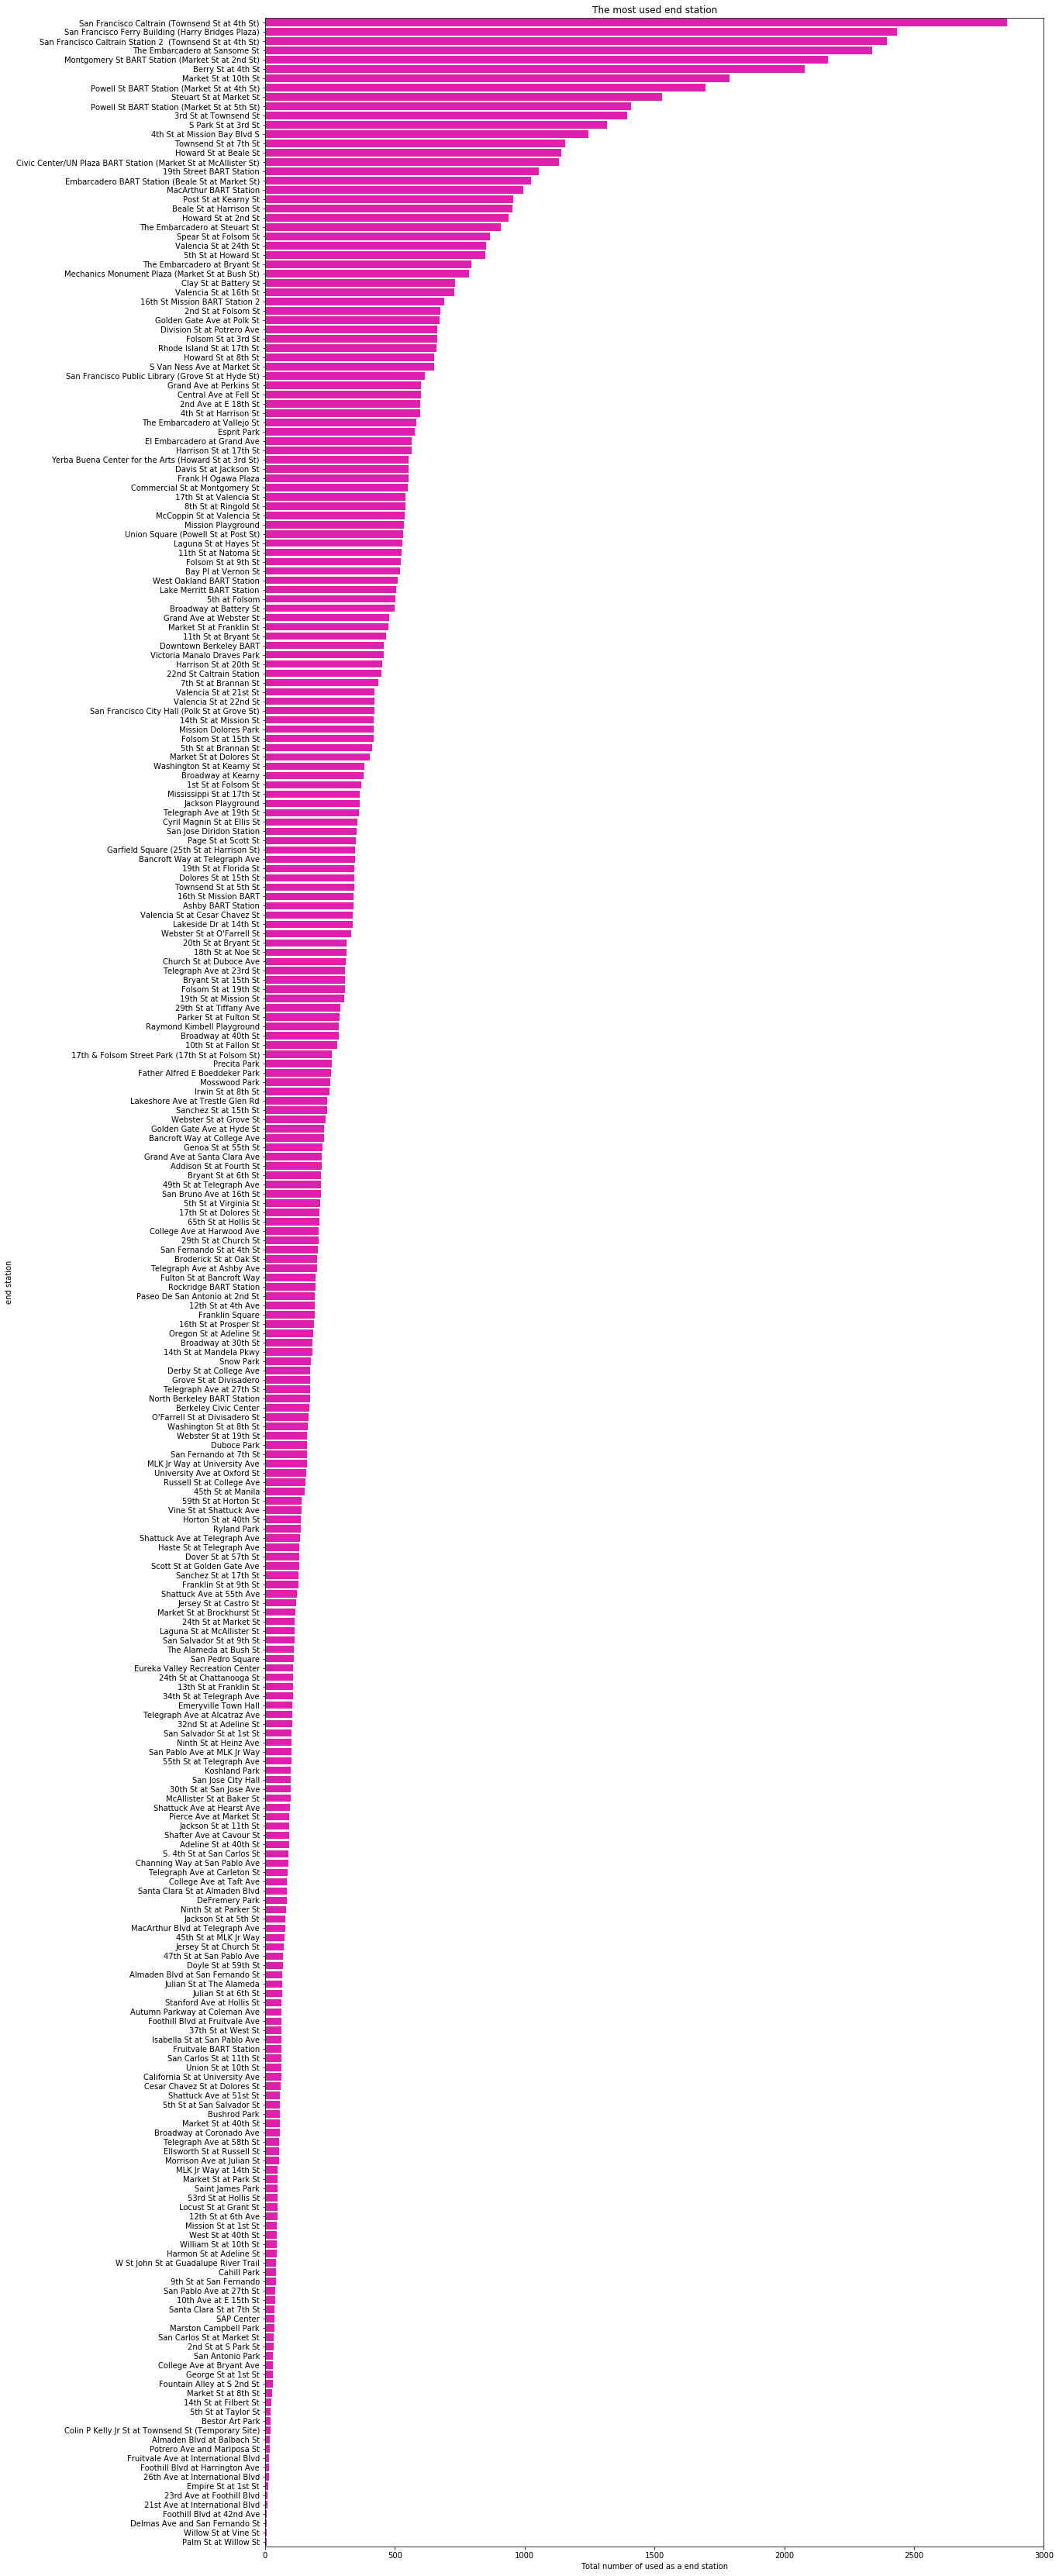

In [192]:
#Get the order of bars by frequency
start_order = BayWheels['end_station_name'].value_counts()
start_order = start_order.index

plt.figure(figsize=[18,60])
sb.countplot(data = BayWheels, y='end_station_name', color = base_color, order = start_order)
plt.ylabel('end station')
plt.title('The most used end station')
plt.xlabel('Total number of used as a end station');

 The trend of the most used start and end station for subscribers and customers is similar. San Francisco Caltrain, San Francisco Ferry Building is the most used station for both start and end station. This makes sense because these locations are transit stations for commuters. Users use BayWheel to get to their office from their primary commute transportation (Caltrain or Ferry) and ride to their office and vise verse. 

#### Roundtrips

In [193]:
#:List up top 15 stations used for round trips

round_trip = BayWheels.query('start_station_name == end_station_name')
round_trip = round_trip['start_station_name'].value_counts()
round_trip = pd.DataFrame(round_trip)
round_trip = round_trip.reset_index()
round_trip = round_trip.rename(index=str, columns={'index': 'start_station_name', 'start_station_name': 'trip_count'})
round_trip = round_trip.head(15)


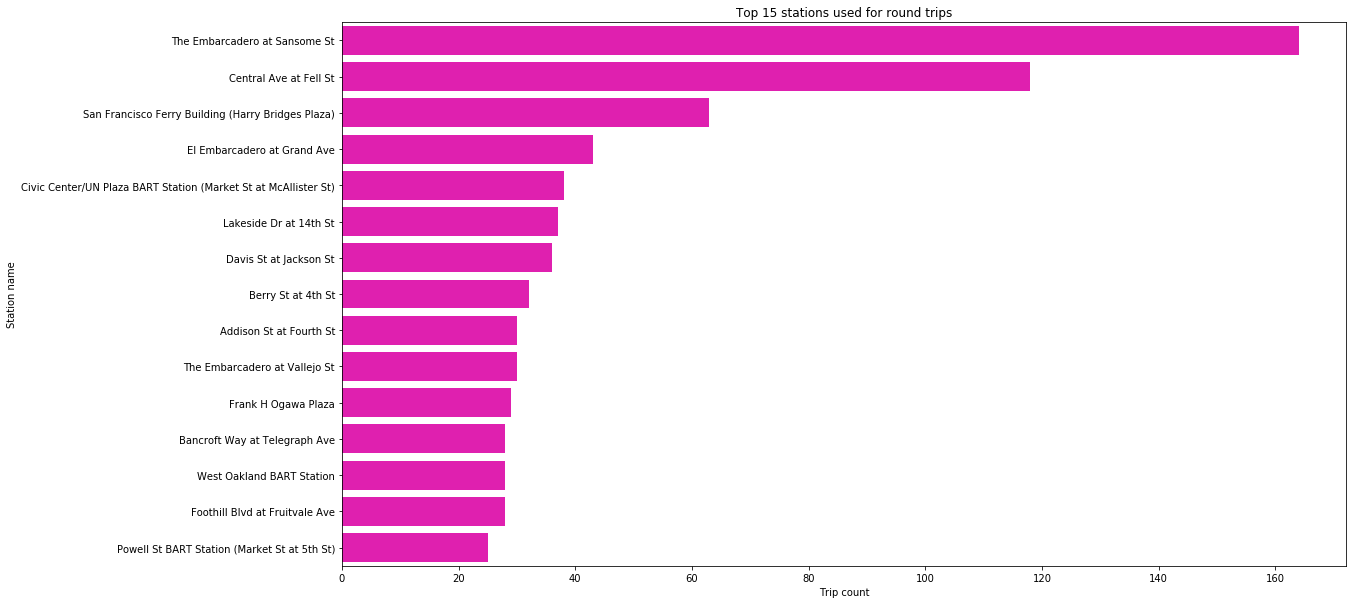

In [194]:
round_trip_order = round_trip['start_station_name'].value_counts()
round_trip_order = round_trip_order.index
round_trip_order

plt.figure(figsize=[18,10])
sb.barplot(data = round_trip, y='start_station_name', x='trip_count', color = base_color)
plt.title('Top 15 stations used for round trips')
plt.xlabel('Trip count')
plt.ylabel('Station name');


The most used station for round trips is the Embarcadero at Sansome St followed by Central Ave at Fell and San Francisco Ferry Building.  The Embarcadero at Sansome St and San Francisco Ferry Building make sense because both are near the station of public transportation and located in downtown. On the other hand, Central Ave at Fell St looks a bit strange because it's far from downtown and there is no public transportation station. Since it's next to a park, The Panhandle where is connected to Golden gate park, this station might be used mainly by people enjoy bike ride rather than use bikes for commuting. 

Let's compare subscribers' and customers' trip records to find out this mystery. 

In [195]:
#Subscriber's rountrips
round_trip_subsc = BayWheels.query('start_station_name == end_station_name & user_type == "Subscriber"')
round_trip_subsc = round_trip_subsc['start_station_name'].value_counts()
round_trip_subsc = pd.DataFrame(round_trip_subsc)
round_trip_subsc = round_trip_subsc.reset_index()
round_trip_subsc = round_trip_subsc.rename(index=str, columns={'index': 'start_station_name', 'start_station_name': 'trip_count'})
round_trip_subsc = round_trip_subsc.head(15)

round_trip_subsc


,start_station_name,trip_count
0,Davis St at Jackson St,29
1,Civic Center/UN Plaza BART Station (Market St ...,28
2,The Embarcadero at Sansome St,27
3,Foothill Blvd at Fruitvale Ave,26
4,Frank H Ogawa Plaza,26
5,West Oakland BART Station,24
6,Washington St at 8th St,17
7,Central Ave at Fell St,17
8,Berry St at 4th St,17
9,Franklin St at 9th St,14


In [196]:
#Customer's roundtrips
round_trip_cust = BayWheels.query('start_station_name == end_station_name & user_type == "Customer"')
round_trip_cust = round_trip_cust['start_station_name'].value_counts()
round_trip_cust = pd.DataFrame(round_trip_cust)
round_trip_cust = round_trip_cust.reset_index()
round_trip_cust = round_trip_cust.rename(index=str, columns={'index': 'start_station_name', 'start_station_name': 'trip_count'})
round_trip_cust = round_trip_cust.head(15)

round_trip_cust

,start_station_name,trip_count
0,The Embarcadero at Sansome St,137
1,Central Ave at Fell St,101
2,San Francisco Ferry Building (Harry Bridges Pl...,59
3,El Embarcadero at Grand Ave,34
4,The Embarcadero at Vallejo St,26
5,Powell St BART Station (Market St at 5th St),23
6,Lakeside Dr at 14th St,23
7,Bancroft Way at Telegraph Ave,22
8,Addison St at Fourth St,21
9,Union Square (Powell St at Post St),20


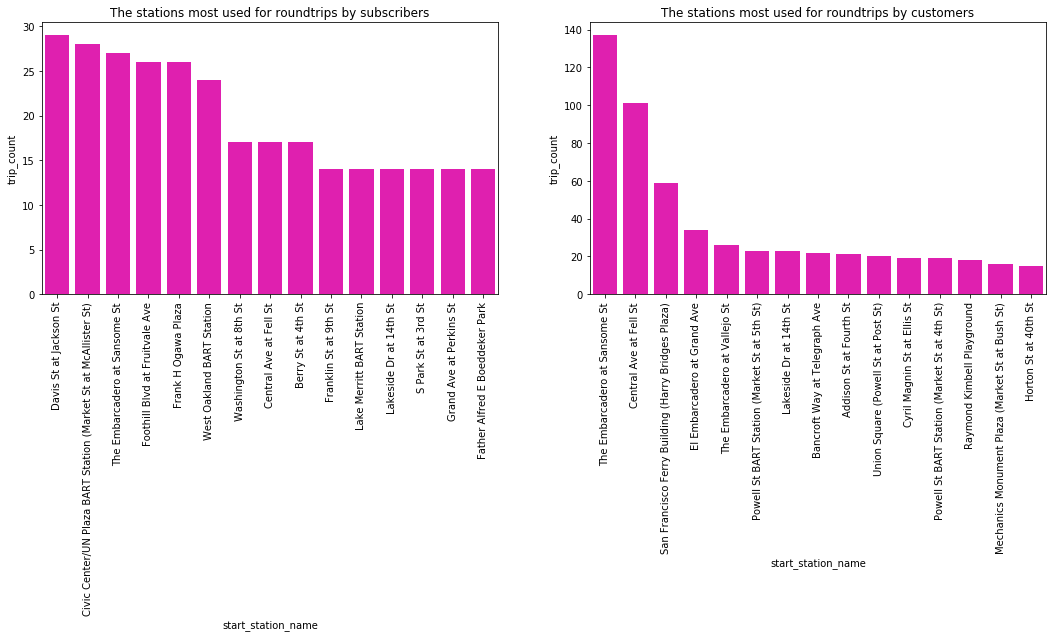

In [197]:
plt.figure(figsize=[18,5])

#Plot1: Subscriber's roundtrip
plt.subplot(1,2,1)
sb.barplot(data = round_trip_subsc, x = 'start_station_name', y= 'trip_count', color= base_color)
plt.xticks (rotation = 90)
plt.title('The stations most used for roundtrips by subscribers')

#Plot2: Customer's roundtrip
plt.subplot(1,2,2)
sb.barplot(data = round_trip_cust, x = 'start_station_name', y = 'trip_count', color = base_color)
plt.title('The stations most used for roundtrips by customers')
plt.xticks (rotation = 90);


After I compared the roundtrip data of subscribers and customers, we can see Central Ave at Fell St is the second most used station for customers' roundtrips. This assured my earlier assumption that people use the station to enjoy bike riding rather than for a commuting purpose. According to [Fitt.com](https://fitt.co/san-francisco/articles/best-bike-trails-san-francisco-rides), people ride bikes from the Panhandle, ride through Golden Gate Park and then take a right on Conservatory Drive to hop onto Arguello.

I also found out that The Embacadero at Sansome St station is used by customers for roundtrips the most instead of by subscribers as I originally assumed. This could be because this station is the closest station to Pier 39, one of the popular sightseeing spots and tourist or casual riders use bikes to crouse around the pier 39 area.

### 4) Propotion of Subscriber v.s. Customer

In [198]:
BayWheels['user_type'].unique()

array(['Subscriber', 'Customer'], dtype=object)

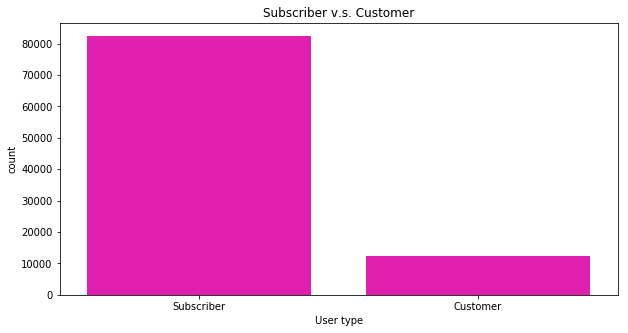

In [199]:
plt.figure(figsize=[10,5])
sb.countplot(data = BayWheels, x='user_type', color = base_color)
plt.title('Subscriber v.s. Customer')
plt.xlabel('User type');

The most of the rides are made by subscribrs. 

## Bivariate Exploration

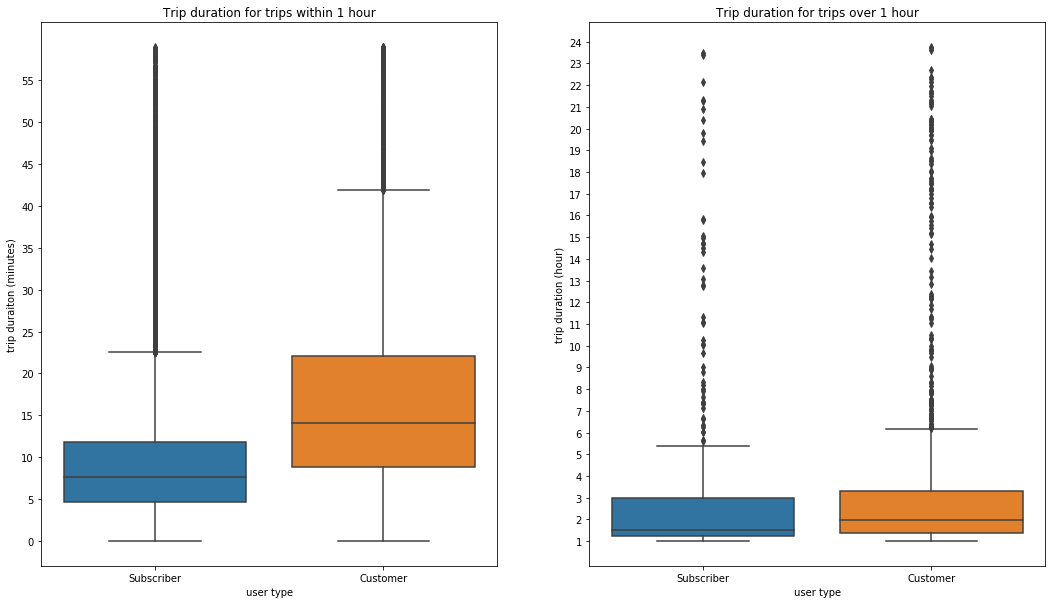

In [200]:
plt.figure(figsize=[18,10])

# Subplot 1: Trips within 1 hour
plt.subplot(1,2,1)

minutes = 60
ticks_minutes = list(range(minutes, minutes*61, minutes*5))
tick_label_minutes = list(range(0, 61, 5)) 


sb.boxplot(data = BayWheels_1hour, x= 'user_type', y='duration_sec')
plt.title('Trip duration for trips within 1 hour')
plt.yticks(ticks_minutes, tick_label_minutes)
plt.xlabel('user type')
plt.ylabel('trip duraiton (minutes)')

# Subplot 1: Trips over 1 hour
plt.subplot(1,2,2)

hours = 60**2
ticks = list(range(hours, hours*25, hours))
tick_label = list(range(1, 25)) 



sb.boxplot(data = BayWheels_over1, x= 'user_type', y='duration_sec')
plt.title('Trip duration for trips over 1 hour')
plt.yticks(ticks, tick_label)
plt.xlabel('user type')
plt.ylabel('trip duration (hour)');




For the trips within 1 hour, subscribers tend to enjoy a shorter ride than customers (non-members) and have more outliers. 

For the trips over 1 hour, the duration of trips of customers(non-members) are slightly longer than subscribers and have more outliers, however, there is not much big difference. This might be because both types of users have to pay extra $3 per an additional 15 minutes for the trip over 1 hour regardless of user type.


For customers (non-members), it gets more expensive when they ride more than 30 minutes.  For members, it costs an extra $3 per additional 15 minutes. This threshold might affect the trip duration and we should look into it.

In [201]:
#Create sub-datasets for subscribers and customers(non-subscribers) who ride for less than 1 hour

Subc_45 = BayWheels_1hour.query('user_type == "Subscriber"')
Cus_45 = BayWheels_1hour.query('user_type == "Customer"')

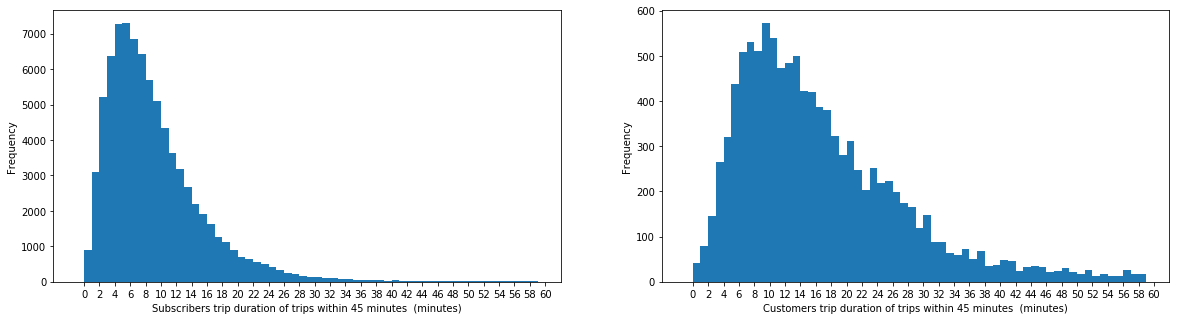

In [202]:
#Set the bin size
minutes = 60
bins = np.arange(0, minutes*60+minutes, minutes)
ticks = list(range(minutes, minutes*62, minutes*2))
tick_label = list(range(0, 62,2)) 


plt.figure(figsize=[20,5])

#Subplot 1: Subscribers
plt.subplot(1,2,1)
plt.hist(data = Subc_45, x = 'duration_sec', bins = bins)
plt.xlabel('Subscribers trip duration of trips within 45 minutes  (minutes)')
plt.xticks(ticks, tick_label)
plt.ylabel('Frequency')

#Subplot 2: Customers
plt.subplot(1,2,2)
plt.hist(data = Cus_45, x = 'duration_sec', bins = bins)
plt.xlabel('Customers trip duration of trips within 45 minutes  (minutes)')
plt.ylabel('Frequency')
plt.xticks(ticks, tick_label);

The majority of subscribers ended the trips within 30 minutes even though they have an unlimited 45 minutes ride. Customers tended to travel longer even after 30 minutes ride, which is the threshold of extra charge. 

In [203]:
#Create sub-datasets for subscribers and customers(non-subscribers) who ride for over than 1 hour

Subc_over1 = BayWheels_over1.query('user_type == "Subscriber"')
Cus_over1 = BayWheels_over1.query('user_type == "Customer"')

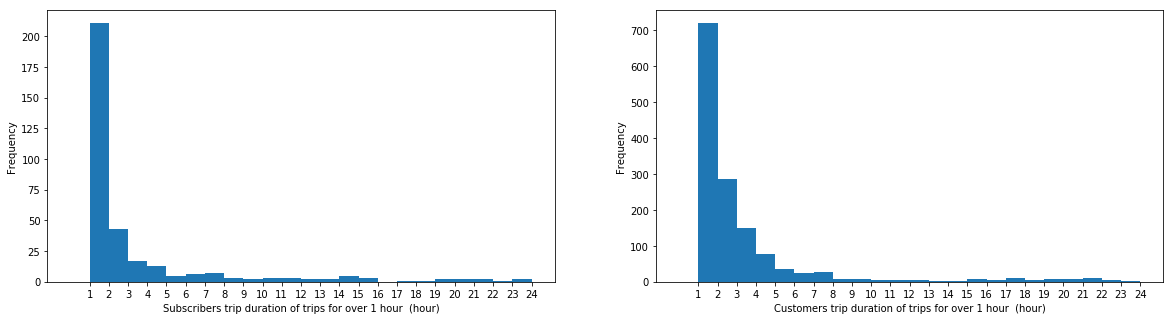

In [204]:
#Set the bin size
hours = 60**2
bins = np.arange(0, hours*24+hours, hours)
ticks = list(range(hours, hours*25, hours))
tick_label = list(range(1, 25)) 


plt.figure(figsize=[20,5])

#Subplot 1: Subscribers
plt.subplot(1,2,1)
plt.hist(data = Subc_over1, x = 'duration_sec', bins = bins)
plt.xlabel('Subscribers trip duration of trips for over 1 hour  (hour)')
plt.xticks(ticks, tick_label)
plt.ylabel('Frequency')

#Subplot 2: Customers
plt.subplot(1,2,2)
plt.hist(data = Cus_over1, x = 'duration_sec', bins = bins)
plt.xlabel('Customers trip duration of trips for over 1 hour  (hour)')
plt.ylabel('Frequency')
plt.xticks(ticks, tick_label);

The customers' tendency is more prominent for the trip lasted over 1 hour. Even though the total number of customers is smaller than subscribers, the more customers have longer trips. 

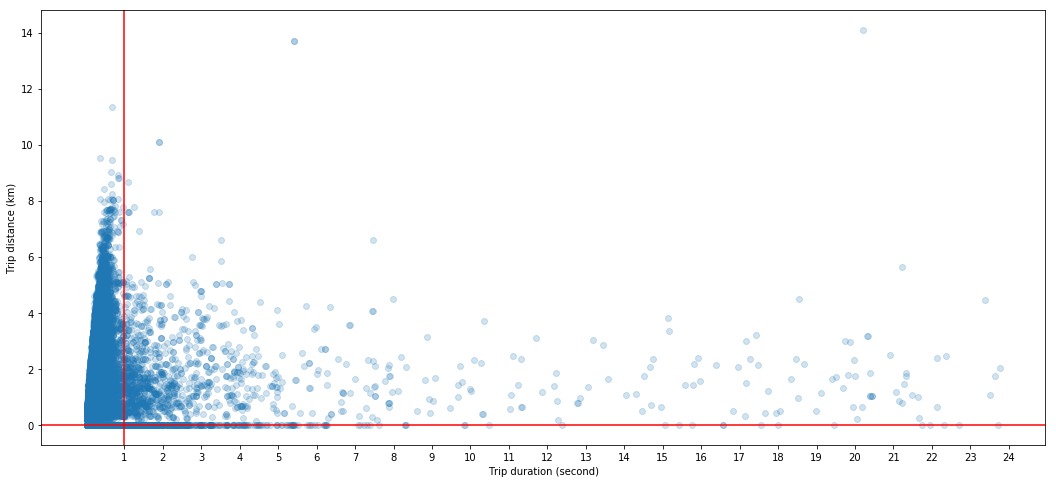

In [205]:
plt.figure(figsize=[18,8])

hours = 60**2
ticks = list(range(hours, hours*25, hours))
tick_label = list(range(1, 25)) 


plt.scatter (data = BayWheels, x = 'duration_sec', y = 'distance', alpha = 1/5)
plt.xlabel('Trip duration (second)')
plt.ylabel('Trip distance (km)')
plt.xticks(ticks, tick_label)
plt.axhline(y = 0, color = 'red')
plt.axvline(x = 3600, color = 'red');

From the plots avobe, we can learn 3 things.
1. Trip distance and trip duration has a positive relationship, which makes sense
2. The majority of trips are made within 8km
3. There are quite a big number of users who made a 0-distance trip, i.e. roundtrips.

## Multivariate Exploration

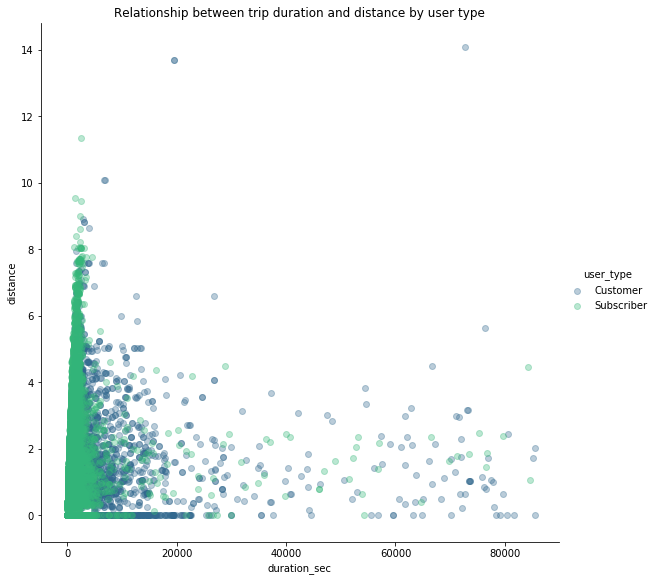

In [206]:
g= sb.FacetGrid(data = BayWheels, hue = 'user_type', height = 8, palette='viridis', hue_order = ["Customer","Subscriber"])
g.map(plt.scatter, 'duration_sec', 'distance', alpha =  1/3)
g.add_legend()
plt.title('Relationship between trip duration and distance by user type');

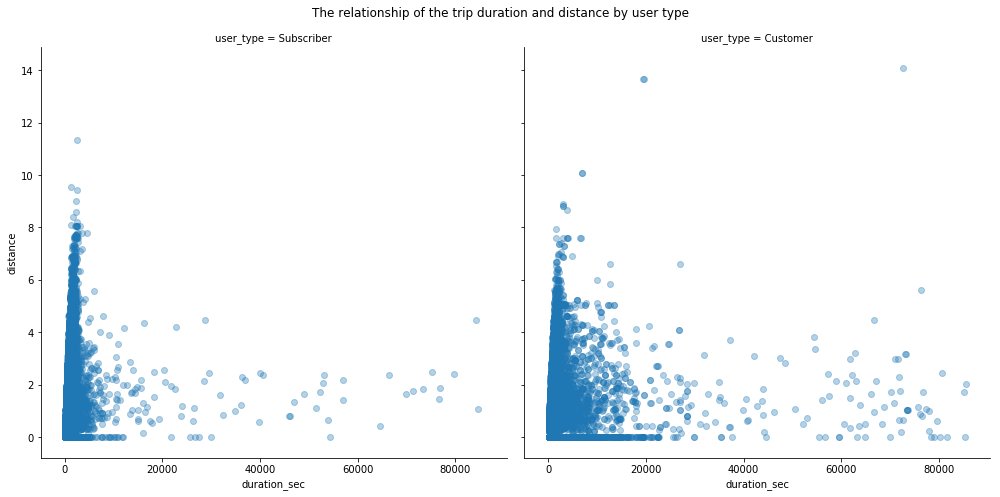

In [207]:
g = sb.FacetGrid(data = BayWheels, col = 'user_type', height = 7, margin_titles=True)
g.map(plt.scatter, 'duration_sec', 'distance', alpha =  1/3)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('The relationship of the trip duration and distance by user type');

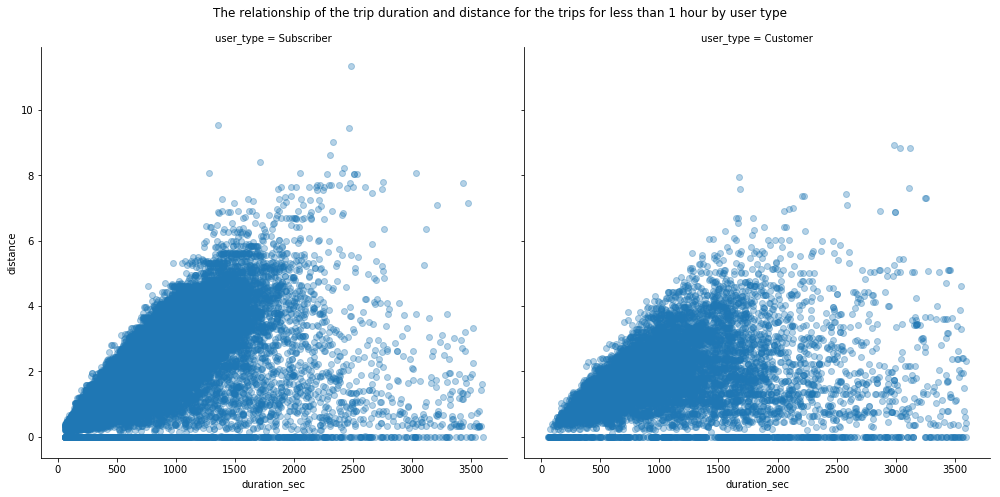

In [208]:
#Trips less than 1 hour
g = sb.FacetGrid(data = BayWheels_1hour, col = 'user_type', height = 7, margin_titles=True)
g.map(plt.scatter, 'duration_sec', 'distance', alpha =  1/3)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('The relationship of the trip duration and distance for the trips for less than 1 hour by user type');

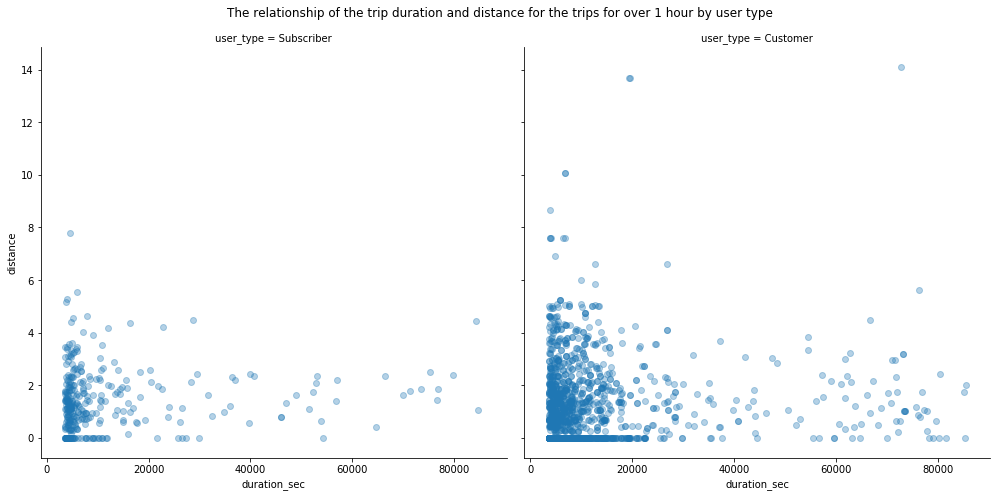

In [209]:
#Trips over 1 hour
g = sb.FacetGrid(data = BayWheels_over1, col = 'user_type', height = 7, margin_titles=True)
g.map(plt.scatter, 'duration_sec', 'distance', alpha =  1/3)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('The relationship of the trip duration and distance for the trips for over 1 hour by user type');

From these plots, we can found out 3 things:
1. Subscribers tend to have a shorter duration trip than customers(non-subscribers)
2. For the trips lasted less than 1 hour, subscribers tend to have a longer distance trip than customers
3. On the other hand, for the trips lasted more than 1 hour, customers tend to have a longer distance and duration trip than subscribers